In [5]:
from google.colab import drive
drive.mount('/content/gdrive' )

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#importing libraries
import pandas as pd
import h5py
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [0]:
#loadin dataset
file = h5py.File('gdrive/My Drive/Colab Notebooks/assignment/SVHN_single_grey1-2.h5', 'r')

Data fetching and understand the train/val/test splits.


In [8]:
# List all groups
print("Keys: %s" % file.keys())
a_group_key = list(file.keys())
print(a_group_key)

Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>
['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [0]:
#splitting training,validation and test from original dataset
X_train = np.array(file['X_train'])
y_train = np.array(file['y_train'])
X_val = np.array(file['X_val'])
y_val = np.array(file['y_val'])
X_test = np.array(file['X_test'])
y_test = np.array(file['y_test'])

In [10]:
# data shape is
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(42000, 32, 32)
(60000, 32, 32)
(18000, 32, 32)
(42000,)
(60000,)
(18000,)


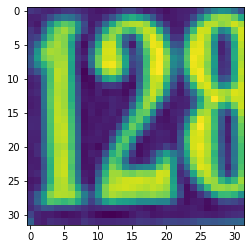

In [11]:
#considering file is clean data proceeding with model building functionalities.
plt.figure()
plt.imshow(X_train[0])
plt.grid(False)
plt.show()

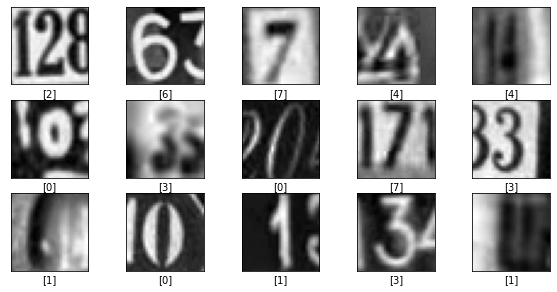

Label for each of the above image is [2 6 7 4 4 0 3 0 7 3 1 0 1 3 1]


In [12]:
#viewing the training data
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel([y_train[i]])
plt.show()
print('Label for each of the above image is',y_train[0:15])

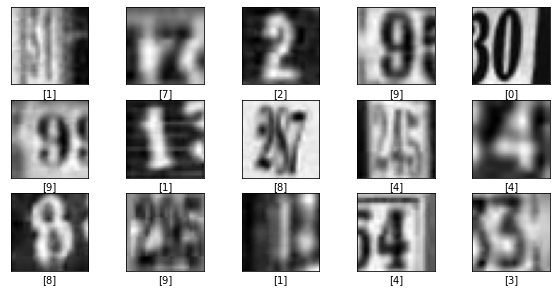

Label for each of the above image is [1 7 2 9 0 9 1 8 4 4 8 9 1 4 3]


In [13]:
# verifying test data
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel([y_test[i]])
plt.show()
print('Label for each of the above image is',y_test[0:15])

In [14]:
y_train , y_test, y_val

(array([2, 6, 7, ..., 7, 0, 4], dtype=uint8),
 array([1, 7, 2, ..., 7, 9, 2], dtype=uint8),
 array([0, 0, 0, ..., 9, 9, 9], dtype=uint8))

In [0]:
y_trainc = tf.keras.utils.to_categorical(y_train,num_classes=10)

In [0]:
y_testc = tf.keras.utils.to_categorical(y_test,num_classes=10)

In [0]:
y_valc = tf.keras.utils.to_categorical(y_val,num_classes=10)

In [18]:
y_trainc

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
y_testc

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [20]:
y_valc

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [0]:
#scaling the data between 0-1
X_trains = X_train/255.0
X_tests = X_test/255.0
X_vals = X_val/255.0

In [19]:
X_trains

array([[[0.12968785, 0.11866706, 0.10530196, ..., 0.2801847 ,
         0.2283153 , 0.16860352],
        [0.09893451, 0.10020902, 0.1175549 , ..., 0.4432192 ,
         0.40534863, 0.33056822],
        [0.10304902, 0.08868118, 0.15873058, ..., 0.44432473,
         0.47754902, 0.45263842],
        ...,
        [0.11196157, 0.14200786, 0.17678471, ..., 0.09465059,
         0.09840274, 0.10219726],
        [0.15072627, 0.10381687, 0.09126157, ..., 0.11023294,
         0.11556196, 0.11790627],
        [0.19724864, 0.10226392, 0.0942702 , ..., 0.19477727,
         0.19942354, 0.20799099]],

       [[0.34101608, 0.3414451 , 0.34656274, ..., 0.3600055 ,
         0.35195178, 0.3628635 ],
        [0.33995295, 0.340829  , 0.34287727, ..., 0.35580626,
         0.3419765 , 0.34730548],
        [0.33711922, 0.33652744, 0.33695647, ..., 0.25044155,
         0.23458785, 0.21521765],
        ...,
        [0.35381806, 0.35703844, 0.3665243 , ..., 0.21707255,
         0.19051842, 0.17276745],
        [0.3

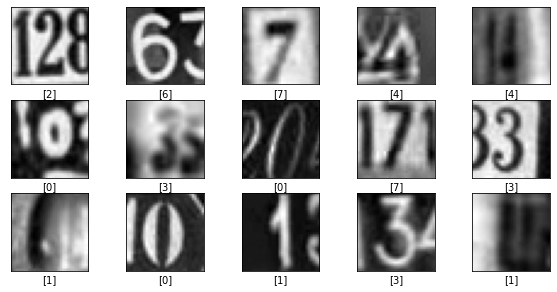

Label for each of the above image is [2 6 7 4 4 0 3 0 7 3 1 0 1 3 1]


In [70]:
#viewing the sample image after scaling
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_trains[i], cmap=plt.cm.binary) 
    plt.xlabel([y_train[i]])
plt.show()
print('Label for each of the above image is',y_train[0:15])

Building feed forward neural network which consist of simple input and hidden layers with weights and bias added to each layer





Building neural network model in tensorflow without batch normalization layer and with 15 epochs

In [0]:
X_train = X_train.reshape(42000,1024)
X_test = X_test.reshape(18000,1024)


In [0]:
#implementation of 
# Requires: numpy, sklearn>=0.18.1, tensorflow>=1.0

# NOTE: In order to make the code simple, we rewrite x * W_1 + b_1 = x' * W_1'
# where x' = [x | 1] and W_1' is the matrix W_1 appended with a new row with elements b_1's.
# Similarly, for h * W_2 + b_2
import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 



def init_weights(shape):
    """ Weight initialization """
    weights = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(weights)

def forwardprop(X, w_1, w_2, w_3,w_4):
    """
    Forward-propagation.
    IMPORTANT: yhat is not softmax since TensorFlow's softmax_cross_entropy_with_logits() does that internally.
    """
    h    = tf.nn.relu(tf.matmul(X, w_1))
    h1   = tf.nn.relu(tf.matmul(h, w_2))
    h2   = tf.nn.relu(tf.matmul(h1, w_3)) # The \relu function
    yhat =  tf.matmul(h2, w_4)  # The \varphi function
    return yhat



def main():

    # Layer's sizes
    x_size = X_train.shape[1]   # Number of input nodes: 4 features and 1 bias
    h_size = 1024
    h1_size = 1024 
    h2_size = 1024                    # Number of hidden nodes
    y_size = y_trainc.shape[1]   # 

    # Symbols
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])

    # Weight initializations
    w_1 = init_weights((x_size, h_size))
    w_2 = init_weights((h_size, h1_size))
    w_3 = init_weights((h1_size, h2_size))
    w_4 = init_weights((h2_size,y_size))

    # Forward propagation
    yhat    = forwardprop(X, w_1, w_2, w_3, w_4)
    predict = tf.argmax(yhat, axis=1)

    # Backward propagation
    cost    = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
    updates = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

    # Run SGD
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)

    for epoch in range(15):
        # Train with each example
        for i in range(len(X_train)):
            sess.run(updates, feed_dict={X: X_train[i: i + 1], y: y_trainc[i: i + 1]})

        train_accuracy = np.mean(np.argmax(y_trainc, axis=1) ==
                                 sess.run(predict, feed_dict={X: X_train, y: y_trainc}))
        test_accuracy  = np.mean(np.argmax(y_testc, axis=1) ==
                                 sess.run(predict, feed_dict={X: X_test, y: y_testc}))

        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
              % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))

    sess.close()

if __name__ == '__main__':
    main()


Epoch = 1, train accuracy = 9.97%, test accuracy = 10.08%
Epoch = 2, train accuracy = 9.97%, test accuracy = 10.08%
Epoch = 3, train accuracy = 9.97%, test accuracy = 10.08%
Epoch = 4, train accuracy = 9.97%, test accuracy = 10.08%
Epoch = 5, train accuracy = 9.97%, test accuracy = 10.08%
Epoch = 6, train accuracy = 9.97%, test accuracy = 10.08%
Epoch = 7, train accuracy = 9.97%, test accuracy = 10.08%
Epoch = 8, train accuracy = 9.97%, test accuracy = 10.08%
Epoch = 9, train accuracy = 9.97%, test accuracy = 10.08%
Epoch = 10, train accuracy = 9.97%, test accuracy = 10.08%
Epoch = 11, train accuracy = 9.97%, test accuracy = 10.08%
Epoch = 12, train accuracy = 9.97%, test accuracy = 10.08%
Epoch = 13, train accuracy = 9.97%, test accuracy = 10.08%
Epoch = 14, train accuracy = 9.97%, test accuracy = 10.08%
Epoch = 15, train accuracy = 9.97%, test accuracy = 10.08%


Without batchnormalization layer the accuracy of the model is very poor with less epochs in tensorflow. Lets see the implementation of feed forward network in Keras with batchnormalization layer

In [0]:
#without hidden layers and with output layer with softmax activation function
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=["accuracy"])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
output = model.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=20)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 4s 93us/sample - loss: 2.3216 - acc: 0.1099 - val_loss: 2.3074 - val_acc: 0.1196
Epoch 2/20
42000/42000 [==============================] - 3s 75us/sample - loss: 2.3056 - acc: 0.1237 - val_loss: 2.2889 - val_acc: 0.1490
Epoch 3/20
42000/42000 [==============================] - 3s 75us/sample - loss: 2.2955 - acc: 0.1413 - val_loss: 2.2916 - val_acc: 0.1324
Epoch 4/20
42000/42000 [==============================] - 3s 76us/sample - loss: 2.2900 - acc: 0.1503 - val_loss: 2.2789 - val_acc: 0.1546
Epoch 5/20
42000/42000 [==============================] - 3s 81us/sample - loss: 2.2850 - acc: 0.1550 - val_loss: 2.2934 - val_acc: 0.1547
Epoch 6/20
42000/42000 [==============================] - 3s 78us/sample - loss: 2.2816 - acc: 0.1612 - val_loss: 2.2882 - val_acc: 0.1454
Epoch 7/20
42000/42000 [==============================] - 3s 75us/sample - loss: 2.2791 - acc: 0.1657 - val_loss: 2.

Train: 0.194, Test: 0.182


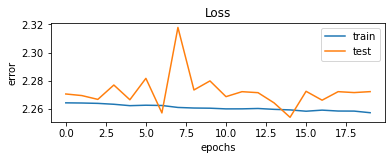

In [0]:
trainloss, trainaccuracy = model.evaluate(X_trains, y_trainc, verbose=0)
testloss,testaccuracy = model.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy, testaccuracy))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output.history['loss'], label='train')
pyplot.plot(output.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

Model performed poorly without hidden layers and activation function

Building neural network with hidden layers with activation function as reLU


In [0]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#first hidden layer with relu activation function
model1.add(tf.keras.layers.Dense(100,activation = 'relu'))

#second hidden layer with relu activation function
model1.add(tf.keras.layers.Dense(1000,activation = 'relu'))

#output layer with softmax activation function
model1.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model1.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=["accuracy"])
output1= model1.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=50, batch_size = 100)

Epoch 1/50
420/420 [==============================] - 4s 8ms/step - loss: 2.3000 - accuracy: 0.1174 - val_loss: 2.2930 - val_accuracy: 0.1335
Epoch 2/50
420/420 [==============================] - 3s 8ms/step - loss: 2.2889 - accuracy: 0.1466 - val_loss: 2.2836 - val_accuracy: 0.1496
Epoch 3/50
420/420 [==============================] - 3s 8ms/step - loss: 2.2760 - accuracy: 0.1859 - val_loss: 2.2665 - val_accuracy: 0.1930
Epoch 4/50
420/420 [==============================] - 3s 8ms/step - loss: 2.2552 - accuracy: 0.2268 - val_loss: 2.2406 - val_accuracy: 0.2331
Epoch 5/50
420/420 [==============================] - 3s 8ms/step - loss: 2.2205 - accuracy: 0.2819 - val_loss: 2.1955 - val_accuracy: 0.2803
Epoch 6/50
420/420 [==============================] - 3s 8ms/step - loss: 2.1609 - accuracy: 0.3282 - val_loss: 2.1197 - val_accuracy: 0.3475
Epoch 7/50
420/420 [==============================] - 3s 8ms/step - loss: 2.0704 - accuracy: 0.3663 - val_loss: 2.0145 - val_accuracy: 0.4036
Epoch 

Model performace improved by including 2 hidden layers and increasing the epochs and batch size

Train: 0.773, Test: 0.760


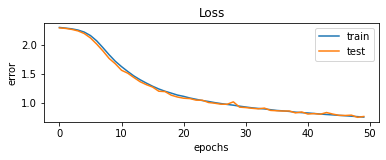

In [0]:
trainloss1, trainaccuracy1 = model1.evaluate(X_trains, y_trainc, verbose=0)
testloss1,testaccuracy1 = model1.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy1, testaccuracy1))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output1.history['loss'], label='train')
pyplot.plot(output1.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

Similar performance is observed in training and test data.

Build neural network model with BatchNormalization layer

In [0]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model2.add(tf.keras.layers.BatchNormalization())

#first hidden layer
model2.add(tf.keras.layers.Dense(100,activation = 'relu'))

#second hidden layer
model2.add(tf.keras.layers.Dense(1000,activation = 'relu'))

#output layer
model2.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model2.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=["accuracy"])
output2 = model2.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=50, batch_size = 100)

Epoch 1/50
420/420 [==============================] - 4s 10ms/step - loss: 2.1905 - accuracy: 0.2410 - val_loss: 2.0243 - val_accuracy: 0.3969
Epoch 2/50
420/420 [==============================] - 4s 10ms/step - loss: 1.7225 - accuracy: 0.4953 - val_loss: 1.4538 - val_accuracy: 0.5955
Epoch 3/50
420/420 [==============================] - 4s 10ms/step - loss: 1.3274 - accuracy: 0.6161 - val_loss: 1.1792 - val_accuracy: 0.6605
Epoch 4/50
420/420 [==============================] - 4s 10ms/step - loss: 1.1460 - accuracy: 0.6630 - val_loss: 1.0465 - val_accuracy: 0.6952
Epoch 5/50
420/420 [==============================] - 4s 10ms/step - loss: 1.0377 - accuracy: 0.6914 - val_loss: 0.9615 - val_accuracy: 0.7193
Epoch 6/50
420/420 [==============================] - 4s 10ms/step - loss: 0.9662 - accuracy: 0.7126 - val_loss: 0.8985 - val_accuracy: 0.7363
Epoch 7/50
420/420 [==============================] - 4s 10ms/step - loss: 0.9105 - accuracy: 0.7284 - val_loss: 0.8542 - val_accuracy: 0.7511

Train: 0.907, Test: 0.851


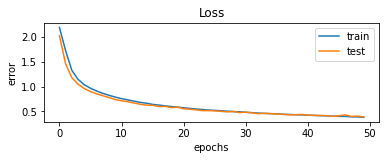

In [0]:
trainloss2, trainaccuracy2 = model2.evaluate(X_trains, y_trainc, verbose=0)
testloss2,testaccuracy2 = model2.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy2, testaccuracy2))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output2.history['loss'], label='train')
pyplot.plot(output2.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()


Model performace improved drastically after including batch normalization layer. The accuracy increased from 76% to 85 %. The loss is similar in training and test data

Using adam optimizer to check the model performance

In [0]:
#using adam optimizer
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model3.add(tf.keras.layers.BatchNormalization())

#first hidden layer
model3.add(tf.keras.layers.Dense(100,activation = 'relu'))

#second hidden layer
model3.add(tf.keras.layers.Dense(1000,activation = 'relu'))
#output layer
model3.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])
output3 = model3.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=50, batch_size = 100)

Epoch 1/50
420/420 [==============================] - 5s 11ms/step - loss: 1.2154 - accuracy: 0.6059 - val_loss: 0.8366 - val_accuracy: 0.7462
Epoch 2/50
420/420 [==============================] - 4s 11ms/step - loss: 0.7886 - accuracy: 0.7574 - val_loss: 0.6843 - val_accuracy: 0.7901
Epoch 3/50
420/420 [==============================] - 5s 11ms/step - loss: 0.6710 - accuracy: 0.7934 - val_loss: 0.5711 - val_accuracy: 0.8301
Epoch 4/50
420/420 [==============================] - 5s 11ms/step - loss: 0.6015 - accuracy: 0.8145 - val_loss: 0.5509 - val_accuracy: 0.8324
Epoch 5/50
420/420 [==============================] - 5s 11ms/step - loss: 0.5511 - accuracy: 0.8290 - val_loss: 0.5072 - val_accuracy: 0.8460
Epoch 6/50
420/420 [==============================] - 5s 11ms/step - loss: 0.5079 - accuracy: 0.8422 - val_loss: 0.5188 - val_accuracy: 0.8401
Epoch 7/50
420/420 [==============================] - 4s 11ms/step - loss: 0.4685 - accuracy: 0.8502 - val_loss: 0.4311 - val_accuracy: 0.8715

Train: 0.985, Test: 0.846


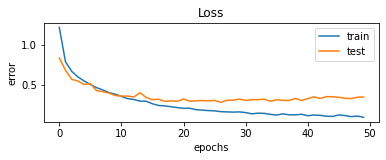

In [0]:
trainloss3, trainaccuracy3 = model3.evaluate(X_trains, y_trainc, verbose=0)
testloss3,testaccuracy3 = model3.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy3, testaccuracy3))
# plot loss during training

pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output3.history['loss'], label='train')
pyplot.plot(output3.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

When adam optimizer is used accuracy dropped from 85 to 84%.

In [0]:
#using batchnormalization layer and dropout layer
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Dense(100,activation = 'relu'))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(1000,activation = 'relu'))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])
output4 = model4.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=70, batch_size = 150)

Epoch 1/70
280/280 [==============================] - 4s 14ms/step - loss: 1.4401 - accuracy: 0.5198 - val_loss: 1.0781 - val_accuracy: 0.7121
Epoch 2/70
280/280 [==============================] - 4s 14ms/step - loss: 1.0030 - accuracy: 0.6873 - val_loss: 0.7788 - val_accuracy: 0.7708
Epoch 3/70
280/280 [==============================] - 4s 14ms/step - loss: 0.8726 - accuracy: 0.7315 - val_loss: 0.6891 - val_accuracy: 0.7948
Epoch 4/70
280/280 [==============================] - 4s 14ms/step - loss: 0.8100 - accuracy: 0.7509 - val_loss: 0.6397 - val_accuracy: 0.8091
Epoch 5/70
280/280 [==============================] - 4s 14ms/step - loss: 0.7609 - accuracy: 0.7657 - val_loss: 0.5802 - val_accuracy: 0.8329
Epoch 6/70
280/280 [==============================] - 4s 14ms/step - loss: 0.7176 - accuracy: 0.7771 - val_loss: 0.5420 - val_accuracy: 0.8421
Epoch 7/70
280/280 [==============================] - 4s 15ms/step - loss: 0.6922 - accuracy: 0.7869 - val_loss: 0.5350 - val_accuracy: 0.8427

Train: 0.962, Test: 0.864


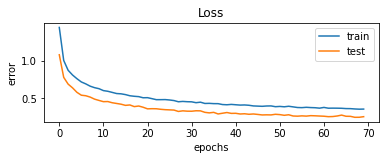

In [0]:
trainloss4, trainaccuracy4 = model4.evaluate(X_trains, y_trainc, verbose=0)
testloss4,testaccuracy4 = model4.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy4, testaccuracy4))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output4.history['loss'], label='train')
pyplot.plot(output4.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

[0.712066650390625, 0.7708333134651184, 0.7947666645050049, 0.8090500235557556, 0.8328666687011719, 0.84211665391922, 0.8427333235740662, 0.8493333458900452, 0.8582166433334351, 0.8611833453178406, 0.8671500086784363, 0.8684166669845581, 0.8718000054359436, 0.8734166622161865, 0.8744333386421204, 0.8836833238601685, 0.8795333504676819, 0.8868499994277954, 0.8858500123023987, 0.8911166787147522, 0.897516667842865, 0.8967000246047974, 0.8971499800682068, 0.8981166481971741, 0.8990499973297119, 0.9012166857719421, 0.9038000106811523, 0.9064666628837585, 0.9058833122253418, 0.9061499834060669, 0.9064000248908997, 0.9068666696548462, 0.9056000113487244, 0.9127333164215088, 0.9142833352088928, 0.9119666814804077, 0.9190999865531921, 0.9182666540145874, 0.9125499725341797, 0.9192666411399841, 0.91798335313797, 0.9199833273887634, 0.9180999994277954, 0.9236666560173035, 0.9195666909217834, 0.9228666424751282, 0.9243999719619751, 0.9244499802589417, 0.9246000051498413, 0.9214166402816772, 0.922

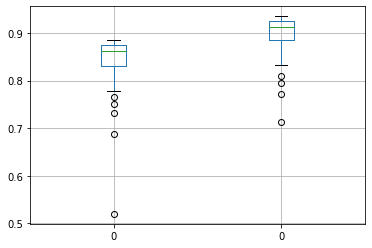

In [0]:
print(output4.history['val_accuracy'])

print(output4.history['accuracy'])

ta = pd.DataFrame(output4.history['accuracy'])
va = pd.DataFrame(output4.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

With Batchnormalization layer and dropout layer model seems to be biased, test loss is lesser than the training loss and test accuracy is higher than the training accuracy

In [0]:
#using adam optimizer with dropout layer
model6 = tf.keras.Sequential()
model6.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model6.add(tf.keras.layers.Dense(100,activation = 'relu'))
model6.add(tf.keras.layers.Dropout(0.2))
model6.add(tf.keras.layers.Dense(1000,activation = 'relu'))
model6.add(tf.keras.layers.Dropout(0.2))
model6.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model6.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])
output6 = model6.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=70, batch_size = 150)

Epoch 1/70
280/280 [==============================] - 4s 13ms/step - loss: 2.2310 - accuracy: 0.1438 - val_loss: 2.0659 - val_accuracy: 0.2265
Epoch 2/70
280/280 [==============================] - 4s 13ms/step - loss: 2.1076 - accuracy: 0.1965 - val_loss: 2.0307 - val_accuracy: 0.2386
Epoch 3/70
280/280 [==============================] - 4s 13ms/step - loss: 2.0820 - accuracy: 0.2035 - val_loss: 2.0003 - val_accuracy: 0.2551
Epoch 4/70
280/280 [==============================] - 4s 13ms/step - loss: 2.0654 - accuracy: 0.2119 - val_loss: 1.9644 - val_accuracy: 0.2700
Epoch 5/70
280/280 [==============================] - 4s 13ms/step - loss: 2.0492 - accuracy: 0.2151 - val_loss: 1.9843 - val_accuracy: 0.2556
Epoch 6/70
280/280 [==============================] - 4s 13ms/step - loss: 2.0396 - accuracy: 0.2203 - val_loss: 1.9246 - val_accuracy: 0.2947
Epoch 7/70
280/280 [==============================] - 4s 13ms/step - loss: 2.0286 - accuracy: 0.2323 - val_loss: 1.9144 - val_accuracy: 0.3057

Model performed poorly without batch normalization layer and with Droput layer. The accuracy dropped from 85 to 51 and we could observe lot of distortion.

In [0]:
#using RandomizedCV to predict best optimizer and best epoch and batch size

In [0]:
def create_model():
  model5 = tf.keras.Sequential()
  model5.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
  model5.add(tf.keras.layers.BatchNormalization())
  model5.add(tf.keras.layers.Dense(100,activation = 'relu'))
  model5.add(tf.keras.layers.Dense(1000,activation = 'relu'))
  model5.add(tf.keras.layers.Dense(10,activation = 'softmax'))
  model5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])
  return model5


In [0]:
modelgrid = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = create_model,verbose=0)

In [0]:


batch_size = [25,30,35,40,50,100,150,180,200]
epochs = [30,50,60,80,100,150,200]
param_grid = dict(epochs = epochs,batch_size = batch_size)
grid = RandomizedSearchCV(estimator=modelgrid, param_distributions=param_grid, n_jobs=-1)
grid_result = grid.fit(X_trains, y_trainc)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [0]:
print(grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
print('mean of accuracy is', means)
print('stds is', stds)

{'optimizer': 'SGD', 'epochs': 120, 'batch_size': 25}
mean of accuracy is [0.83766667 0.84071429 0.84242858 0.83769047 0.83811904 0.83938094
 0.83888096 0.84023809 0.84061905 0.84230952]
stds is [0.0041092  0.00379237 0.00511134 0.00602697 0.00429458 0.00222003
 0.0027547  0.00105411 0.00536186 0.00291081]


In [0]:

def create_model1(optimizer='adam'):
  model7 = tf.keras.Sequential()
  model7.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
  model7.add(tf.keras.layers.BatchNormalization())
  model7.add(tf.keras.layers.Dense(100,activation = 'relu'))
  model7.add(tf.keras.layers.Dense(1000,activation = 'relu'))
  model7.add(tf.keras.layers.Dense(10,activation = 'softmax'))
  model7.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])
  return model7


modelgrid1 = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = create_model1,verbose=0)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid1 = dict(optimizer=optimizer,batch_size=[25,30,50,100],epochs=[60,80,100,120])
grid = RandomizedSearchCV(estimator=modelgrid1, param_distributions=param_grid1, n_jobs=-1,cv=5)
grid_result = grid.fit(X_trains, y_trainc)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [0]:
print(grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
print('mean of accuracy is', means)
print('stds is', stds)

{'optimizer': 'SGD', 'epochs': 120, 'batch_size': 25}
mean of accuracy is [0.83766667 0.84071429 0.84242858 0.83769047 0.83811904 0.83938094
 0.83888096 0.84023809 0.84061905 0.84230952]
stds is [0.0041092  0.00379237 0.00511134 0.00602697 0.00429458 0.00222003
 0.0027547  0.00105411 0.00536186 0.00291081]


Building model with best paramters obtained from RandomizedSearchcv, SGD optimizer and batchsize as 25 and epoch as 120

In [20]:
model8 = tf.keras.Sequential()
model8.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model8.add(tf.keras.layers.BatchNormalization())

#hidden layer1 
model8.add(tf.keras.layers.BatchNormalization())
model8.add(tf.keras.layers.Dense(100,activation = 'relu'))

#hidden layer2
model8.add(tf.keras.layers.BatchNormalization())
model8.add(tf.keras.layers.Dense(1000,activation = 'relu'))


#hidden layer3
model8.add(tf.keras.layers.BatchNormalization())
model8.add(tf.keras.layers.Dense(500,activation = 'relu'))


#output layer
model8.add(tf.keras.layers.Dense(10,activation = 'softmax'))
model8.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=["accuracy"])
output8 = model8.fit(X_trains, y_trainc, validation_data=(X_vals, y_valc), epochs=120, batch_size = 25)

Epoch 1/120
1680/1680 [==============================] - 17s 10ms/step - loss: 1.4035 - accuracy: 0.5297 - val_loss: 0.9275 - val_accuracy: 0.7053
Epoch 2/120
1680/1680 [==============================] - 17s 10ms/step - loss: 0.9707 - accuracy: 0.6873 - val_loss: 0.7325 - val_accuracy: 0.7719
Epoch 3/120
1680/1680 [==============================] - 17s 10ms/step - loss: 0.8397 - accuracy: 0.7273 - val_loss: 0.6351 - val_accuracy: 0.8022
Epoch 4/120
1680/1680 [==============================] - 17s 10ms/step - loss: 0.7553 - accuracy: 0.7570 - val_loss: 0.5610 - val_accuracy: 0.8302
Epoch 5/120
1680/1680 [==============================] - 17s 10ms/step - loss: 0.6924 - accuracy: 0.7772 - val_loss: 0.5215 - val_accuracy: 0.8407
Epoch 6/120
1680/1680 [==============================] - 17s 10ms/step - loss: 0.6536 - accuracy: 0.7924 - val_loss: 0.4876 - val_accuracy: 0.8514
Epoch 7/120
1680/1680 [==============================] - 18s 10ms/step - loss: 0.6142 - accuracy: 0.8010 - val_loss: 0

Train: 0.997, Test: 0.860


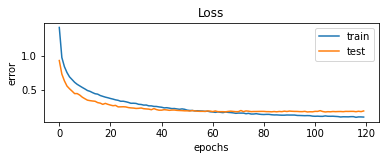

In [21]:
trainloss8, trainaccuracy8 = model8.evaluate(X_trains, y_trainc, verbose=0)
testloss8,testaccuracy8 = model8.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy8, testaccuracy8))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output8.history['loss'], label='train')
pyplot.plot(output8.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

Train: 0.997, Test: 0.860


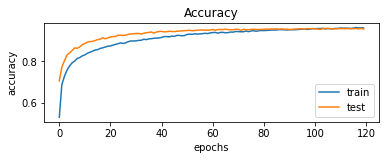

In [22]:
trainloss8, trainaccuracy8 = model8.evaluate(X_trains, y_trainc, verbose=0)
testloss8,testaccuracy8 = model8.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy8, testaccuracy8))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(output8.history['accuracy'], label='train')
pyplot.plot(output8.history['val_accuracy'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('accuracy')

pyplot.legend()

[0.7052666544914246, 0.7719166874885559, 0.8021666407585144, 0.8301500082015991, 0.8406999707221985, 0.8513666391372681, 0.8648166656494141, 0.86285001039505, 0.8696500062942505, 0.8804333209991455, 0.8863166570663452, 0.8927333354949951, 0.8950333595275879, 0.8962666392326355, 0.8999333381652832, 0.9050166606903076, 0.9066500067710876, 0.9140833616256714, 0.9086166620254517, 0.9130499958992004, 0.917116641998291, 0.9198333621025085, 0.9196500182151794, 0.9259666800498962, 0.9257500171661377, 0.9247999787330627, 0.9268666505813599, 0.9301666617393494, 0.9319666624069214, 0.9332333207130432, 0.9342666864395142, 0.9345166683197021, 0.9316666722297668, 0.9355833530426025, 0.9375166893005371, 0.9396833181381226, 0.941516637802124, 0.9364166855812073, 0.9412500262260437, 0.9441333413124084, 0.9445000290870667, 0.9420499801635742, 0.9431333541870117, 0.9451333284378052, 0.9439166784286499, 0.9435833096504211, 0.9452666640281677, 0.9461666941642761, 0.9470499753952026, 0.948033332824707, 0.94

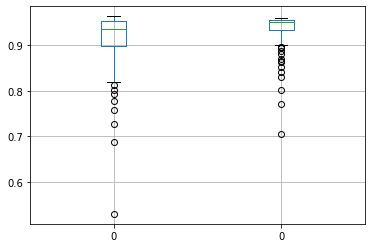

In [23]:
print(output8.history['val_accuracy'])

print(output8.history['accuracy'])

ta = pd.DataFrame(output8.history['accuracy'])
va = pd.DataFrame(output8.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [26]:
model8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 100)               102500    
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              101000    
_________________________________________________________________
batch_normalization_3 (Batch (None, 1000)              4

model performed more or less equally with training and test data.

In [0]:
#adding batch normalization after each layer
model9 = tf.keras.Sequential()
model9.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model9.add(tf.keras.layers.BatchNormalization())

model9.add(tf.keras.layers.Dense(1024))
model9.add(tf.keras.layers.BatchNormalization())
model9.add(tf.keras.layers.Activation('relu'))

model9.add(tf.keras.layers.Dense(2000))
model9.add(tf.keras.layers.BatchNormalization())
model9.add(tf.keras.layers.Activation('relu'))

model9.add(tf.keras.layers.Dense(500))
model9.add(tf.keras.layers.BatchNormalization())
model9.add(tf.keras.layers.Activation('relu'))

model9.add(tf.keras.layers.Dense(10,activation = 'softmax'))
#model9.compile(optimizer='sgd',lr =0.001, loss='categorical_crossentropy',metrics=["accuracy"])
model9.compile(tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.0, nesterov=False),loss='categorical_crossentropy',metrics=["accuracy"])

In [25]:
output9 = model9.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=120, batch_size = 25)


Epoch 1/120
1680/1680 [==============================] - 74s 44ms/step - loss: 1.2769 - accuracy: 0.5805 - val_loss: 0.7946 - val_accuracy: 0.7526
Epoch 2/120
1680/1680 [==============================] - 71s 42ms/step - loss: 0.8729 - accuracy: 0.7212 - val_loss: 0.6380 - val_accuracy: 0.8026
Epoch 3/120
1680/1680 [==============================] - 71s 42ms/step - loss: 0.7394 - accuracy: 0.7650 - val_loss: 0.5637 - val_accuracy: 0.8247
Epoch 4/120
1680/1680 [==============================] - 70s 42ms/step - loss: 0.6644 - accuracy: 0.7886 - val_loss: 0.5125 - val_accuracy: 0.8414
Epoch 5/120
1680/1680 [==============================] - 71s 42ms/step - loss: 0.6066 - accuracy: 0.8062 - val_loss: 0.4363 - val_accuracy: 0.8671
Epoch 6/120
1680/1680 [==============================] - 70s 42ms/step - loss: 0.5655 - accuracy: 0.8167 - val_loss: 0.3973 - val_accuracy: 0.8841
Epoch 7/120
1680/1680 [==============================] - 73s 43ms/step - loss: 0.5203 - accuracy: 0.8312 - val_loss: 0

Train: 0.999, Test: 0.870


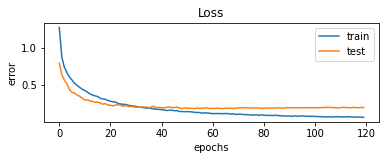

In [27]:
trainloss9, trainaccuracy9 = model9.evaluate(X_trains, y_trainc, verbose=0)
testloss9,testaccuracy9 = model9.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy9, testaccuracy9))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output9.history['loss'], label='train')
pyplot.plot(output9.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

[0.7525666952133179, 0.802566647529602, 0.8246999979019165, 0.8414166569709778, 0.8670833110809326, 0.8841166496276855, 0.880216658115387, 0.8915666937828064, 0.8961166739463806, 0.9074333310127258, 0.9132500290870667, 0.9135500192642212, 0.9179333448410034, 0.9198166728019714, 0.924833357334137, 0.9224333167076111, 0.925433337688446, 0.9333666563034058, 0.930233359336853, 0.9372666478157043, 0.9386166930198669, 0.941100001335144, 0.9375166893005371, 0.93545001745224, 0.9391999840736389, 0.9426833391189575, 0.940500020980835, 0.9436666369438171, 0.9444166421890259, 0.9463333487510681, 0.9488166570663452, 0.9491333365440369, 0.9478333592414856, 0.9481666684150696, 0.9482499957084656, 0.9528999924659729, 0.9473666548728943, 0.944100022315979, 0.9530500173568726, 0.9502333402633667, 0.9519833326339722, 0.9539833068847656, 0.9503999948501587, 0.9505666494369507, 0.9531499743461609, 0.9527000188827515, 0.9514666795730591, 0.9539499878883362, 0.9571333527565002, 0.9539499878883362, 0.9560999

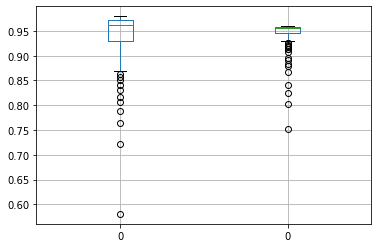

In [28]:
print(output9.history['val_accuracy'])

print(output9.history['accuracy'])

ta = pd.DataFrame(output9.history['accuracy'])
va = pd.DataFrame(output9.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

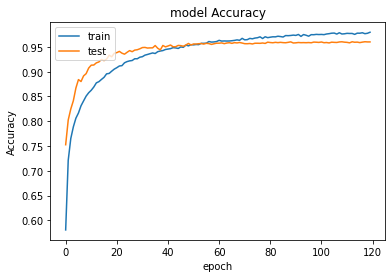

In [29]:
plt.plot(output9.history['accuracy'])
plt.plot(output9.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [30]:
model9.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)              4096      
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              2050000   
_________________________________________________________________
batch_normalization_6 (Batch (None, 2000)             

In [0]:
#using earlystopping to observe model performace
from tensorflow.keras.callbacks import EarlyStopping

model10 = tf.keras.Sequential()
model10.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model10.add(tf.keras.layers.BatchNormalization())

model10.add(tf.keras.layers.Dense(500))
model10.add(tf.keras.layers.BatchNormalization())
model10.add(tf.keras.layers.Activation('relu'))

model10.add(tf.keras.layers.Dense(1000))
model10.add(tf.keras.layers.BatchNormalization())
model10.add(tf.keras.layers.Activation('relu'))

model10.add(tf.keras.layers.Dense(1000))
model10.add(tf.keras.layers.BatchNormalization())
model10.add(tf.keras.layers.Activation('relu'))

model10.add(tf.keras.layers.Dense(10,activation = 'softmax'))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
#model10.compile(optimizer='adam',lr =0.02, loss='categorical_crossentropy',metrics=["accuracy"], callbacks = [es])
model10.compile(tf.keras.optimizers.Nadam(learning_rate=0.02),loss='categorical_crossentropy',metrics=["accuracy"])

In [0]:


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
output10 = model10.fit(X_trains, y_trainc,
                    batch_size=40,
                    epochs=100,
                    verbose=1,
#                    validation_data=(x_test, y_test))
                    validation_data=(X_vals, y_valc), callbacks = [es])


Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 51s 1ms/step - loss: 1.4825 - accuracy: 0.5289 - val_loss: 0.9777 - val_accuracy: 0.6924
Epoch 2/100
42000/42000 [==============================] - 51s 1ms/step - loss: 0.9293 - accuracy: 0.7080 - val_loss: 0.7559 - val_accuracy: 0.7600
Epoch 3/100
42000/42000 [==============================] - 51s 1ms/step - loss: 0.8239 - accuracy: 0.7392 - val_loss: 0.6752 - val_accuracy: 0.7893
Epoch 4/100
42000/42000 [==============================] - 51s 1ms/step - loss: 0.7448 - accuracy: 0.7645 - val_loss: 0.5475 - val_accuracy: 0.8306
Epoch 5/100
42000/42000 [==============================] - 51s 1ms/step - loss: 0.7035 - accuracy: 0.7793 - val_loss: 0.6377 - val_accuracy: 0.8015
Epoch 00005: early stopping


Train: 0.808, Test: 0.786


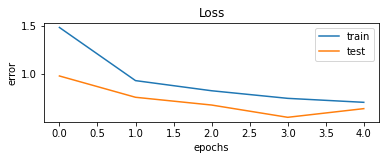

In [0]:
trainloss10, trainaccuracy10 = model10.evaluate(X_trains, y_trainc, verbose=0)
testloss10,testaccuracy10 = model10.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy10, testaccuracy10))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output10.history['loss'], label='train')
pyplot.plot(output10.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

[0.6923999786376953, 0.760016679763794, 0.7892666459083557, 0.8305833339691162, 0.8014833331108093]
[0.52888095, 0.7080476, 0.7392381, 0.7644524, 0.77933335]


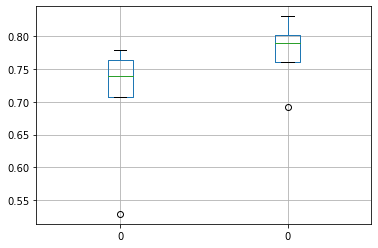

In [0]:
print(output10.history['val_accuracy'])

print(output10.history['accuracy'])

ta = pd.DataFrame(output10.history['accuracy'])
va = pd.DataFrame(output10.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

Model could not perform well with Earlystopping.NN model stopped before reaching global optimum

In [33]:
#adding batch normalization after each layer
model11 = tf.keras.Sequential()
model11.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model11.add(tf.keras.layers.BatchNormalization())

model11.add(tf.keras.layers.Dense(1024))
model11.add(tf.keras.layers.BatchNormalization())
model11.add(tf.keras.layers.Activation('relu'))
model11.add(tf.keras.layers.Dropout(0.2))


model11.add(tf.keras.layers.Dense(2500))
model11.add(tf.keras.layers.BatchNormalization())
model11.add(tf.keras.layers.Dropout(0.2))

model11.add(tf.keras.layers.Dense(600))
model11.add(tf.keras.layers.BatchNormalization())
model11.add(tf.keras.layers.Dropout(0.2))

model11.add(tf.keras.layers.Dense(10,activation = 'softmax'))
#model9.compile(optimizer='sgd',lr =0.001, loss='categorical_crossentropy',metrics=["accuracy"])
model11.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])
output11 = model11.fit(X_trains,y_trainc,validation_data=(X_vals, y_valc),epochs=120, batch_size = 100)

Epoch 1/120
420/420 [==============================] - 54s 129ms/step - loss: 1.6662 - accuracy: 0.4783 - val_loss: 1.0345 - val_accuracy: 0.6792
Epoch 2/120
420/420 [==============================] - 54s 128ms/step - loss: 1.1343 - accuracy: 0.6521 - val_loss: 0.8618 - val_accuracy: 0.7336
Epoch 3/120
420/420 [==============================] - 54s 129ms/step - loss: 0.9606 - accuracy: 0.7086 - val_loss: 0.7529 - val_accuracy: 0.7752
Epoch 4/120
420/420 [==============================] - 54s 128ms/step - loss: 0.8657 - accuracy: 0.7395 - val_loss: 0.6595 - val_accuracy: 0.8065
Epoch 5/120
420/420 [==============================] - 54s 128ms/step - loss: 0.7968 - accuracy: 0.7606 - val_loss: 0.6727 - val_accuracy: 0.8005
Epoch 6/120
420/420 [==============================] - 54s 129ms/step - loss: 0.7469 - accuracy: 0.7751 - val_loss: 0.6285 - val_accuracy: 0.8202
Epoch 7/120
420/420 [==============================] - 58s 139ms/step - loss: 0.7118 - accuracy: 0.7878 - val_loss: 0.5749 -

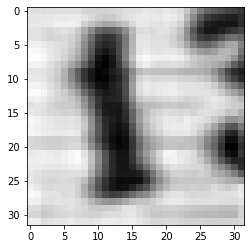

In [0]:
#predicting classes
plt.imshow(X_tests[6].reshape(32,32),cmap='gray')

Train: 0.972, Test: 0.872


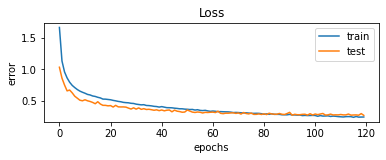

In [35]:
trainloss11, trainaccuracy11 = model11.evaluate(X_trains, y_trainc, verbose=0)
testloss11,testaccuracy11 = model11.evaluate(X_tests, y_testc, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainaccuracy11, testaccuracy11))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output11.history['loss'], label='train')
pyplot.plot(output11.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

[0.6792166829109192, 0.7335666418075562, 0.7751833200454712, 0.8065166473388672, 0.8005499839782715, 0.8202499747276306, 0.8314666748046875, 0.8447999954223633, 0.8569666743278503, 0.8583833575248718, 0.8487666845321655, 0.8600666522979736, 0.8635833263397217, 0.8660333156585693, 0.8718666434288025, 0.8656166791915894, 0.8740666508674622, 0.8811333179473877, 0.880299985408783, 0.8852499723434448, 0.8828666806221008, 0.8906000256538391, 0.8813166618347168, 0.8881000280380249, 0.8887666463851929, 0.8910499811172485, 0.8873000144958496, 0.8952999711036682, 0.8983833193778992, 0.8924833536148071, 0.9009333252906799, 0.8933333158493042, 0.9015499949455261, 0.8964999914169312, 0.9022666811943054, 0.9016000032424927, 0.9042333364486694, 0.9074166417121887, 0.9019333124160767, 0.9087833166122437, 0.9052333235740662, 0.90829998254776, 0.905916690826416, 0.9047999978065491, 0.9159833192825317, 0.9070000052452087, 0.9114999771118164, 0.9141166806221008, 0.918666660785675, 0.9153500199317932, 0.90

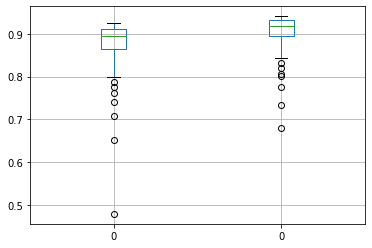

In [36]:
print(output11.history['val_accuracy'])

print(output11.history['accuracy'])

ta = pd.DataFrame(output11.history['accuracy'])
va = pd.DataFrame(output11.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [38]:
model11.predict_classes(X_test)[6]

7

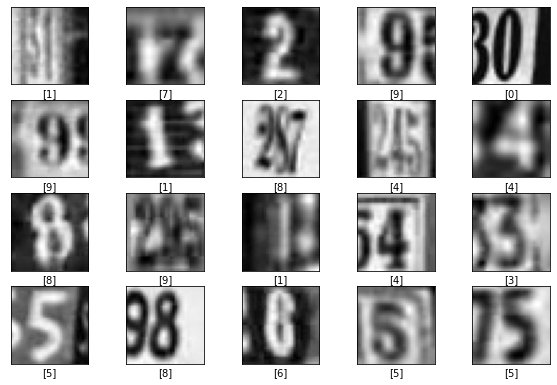

Label for each of the above image is [1 7 2 9 0 9 1 8 4 4 8 9 1 4 3]


In [46]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel([y_test[i]])
plt.show()
print('Label for each of the above image is',y_test[0:15])

In [48]:
#predicting the lables for test data 
n = 20
result = []
for i in range (n):
  results= model11.predict_classes(X_test)[i]
  result.append(results)
  i=i+1
  if(i == n):
    break
print(result)

[9, 2, 2, 9, 9, 9, 7, 1, 2, 4, 6, 3, 4, 3, 3, 5, 3, 6, 3, 5]


From the above results we could see the misclassified values.


Using model11 as final model and printing classfication report and confusion matrix for it

In [42]:
y_pred = model11.predict_classes(X_tests)
print(y_pred)

rounded_labels=np.argmax(y_testc, axis=1)
rounded_labels[1]

[1 7 2 ... 7 9 2]


7

classification report for the model

In [43]:
from sklearn.metrics import classification_report
print(classification_report(rounded_labels, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1814
           1       0.86      0.89      0.87      1828
           2       0.90      0.88      0.89      1803
           3       0.82      0.85      0.83      1719
           4       0.90      0.90      0.90      1812
           5       0.86      0.87      0.86      1768
           6       0.87      0.86      0.86      1832
           7       0.90      0.90      0.90      1808
           8       0.85      0.84      0.85      1812
           9       0.90      0.82      0.86      1804

    accuracy                           0.87     18000
   macro avg       0.87      0.87      0.87     18000
weighted avg       0.87      0.87      0.87     18000



Confusion matrix for the model

In [44]:
conf_mat = confusion_matrix(rounded_labels, y_pred)
conf_mat

array([[1662,   24,    8,   29,   14,    4,   20,   13,   15,   25],
       [  26, 1620,   20,   27,   48,    8,   14,   40,   14,   11],
       [  17,   27, 1592,   36,   27,   10,    4,   43,   23,   24],
       [  15,   27,   25, 1453,   14,   79,   26,   29,   39,   12],
       [  24,   35,   23,   20, 1623,    6,   25,   10,   27,   19],
       [  19,   17,    9,   71,    7, 1533,   62,    6,   29,   15],
       [  45,   21,    9,   26,   26,   57, 1567,    9,   62,   10],
       [  21,   53,   30,   20,   13,    8,    7, 1633,    9,   14],
       [  34,   33,   22,   57,   10,   34,   63,    8, 1517,   34],
       [  67,   32,   35,   43,   17,   45,   15,   22,   40, 1488]])

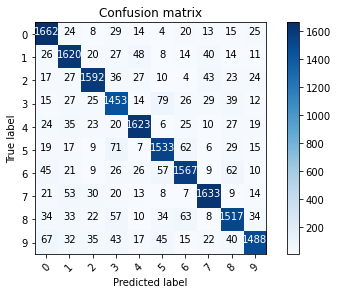

In [45]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



# plot the confusion matrix
plot_confusion_matrix(conf_mat, classes=range(10))


Conclusion: we built a model with SVHN data which is centered around middle digit. Model behaved poorly without hidden layers with accuracy of 10%. After including activation function for hidden layers as Relu and output layer as softmax, the model accuracy increased to 76%. After including Batchnormalisation layer model accuracy increased to 85. With fine tuning and optimizer as SGD the model accuracy increased to 86%.
Batch normalization is a method we can use to normalize the inputs of each layer, in order to fight the internal covariate shift problem.Also we observed that with Earlystopping model could not reach global optimum and stopped at local optimum. The dropout layer introduced distortion. Using CNN can improve the prediction of the images.
